In [123]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [124]:
#Задание 1
#Генерация розового шума через преобразованиье фурье

duration = 5
sample_rate = 4100

num_of_samples = duration*sample_rate

#Генерим белый шум

white_noise = (np.random.random(num_of_samples) - 0.5)*2

x = np.linspace(0,5,num_of_samples)

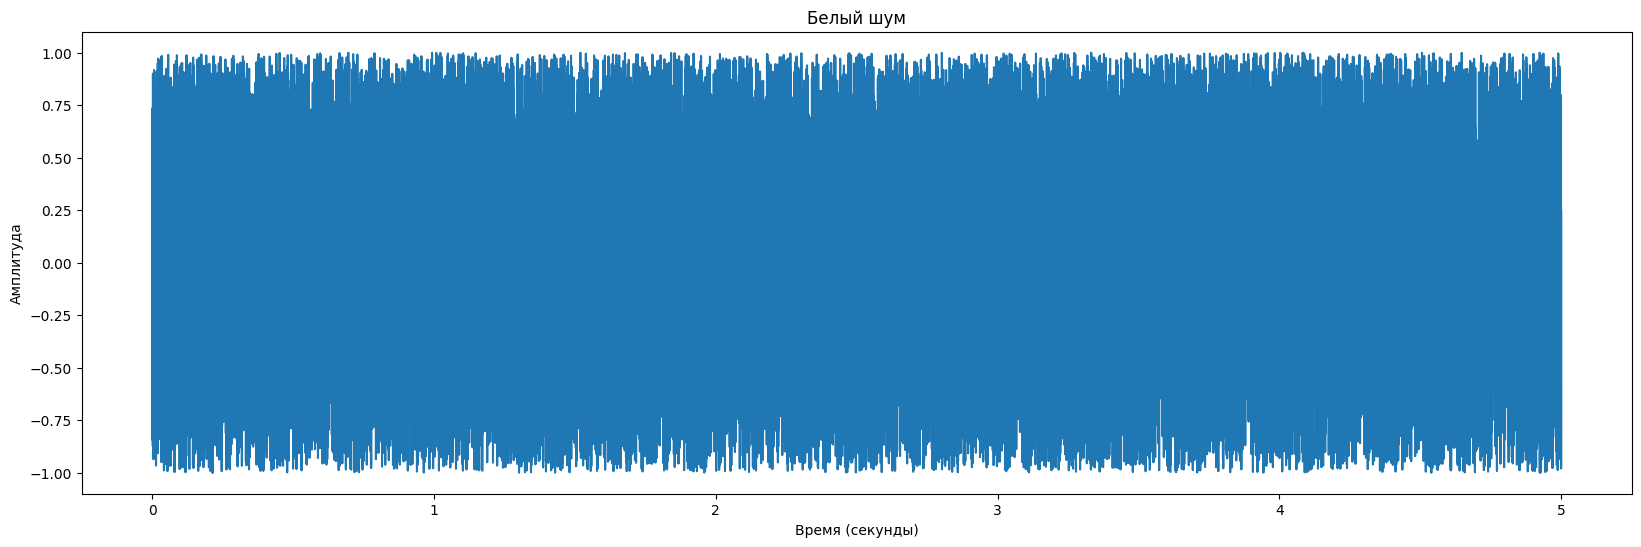

In [125]:
# отрисовываем, что получилось

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(x, white_noise)

# заголовки
plt.title('Белый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [126]:


#Генериум розовый шум

fft = np.fft.rfft(white_noise)

k = np.sqrt(np.arange(1,(num_of_samples)//2+2))

fft = fft/k

fft = np.fft.irfft(fft)

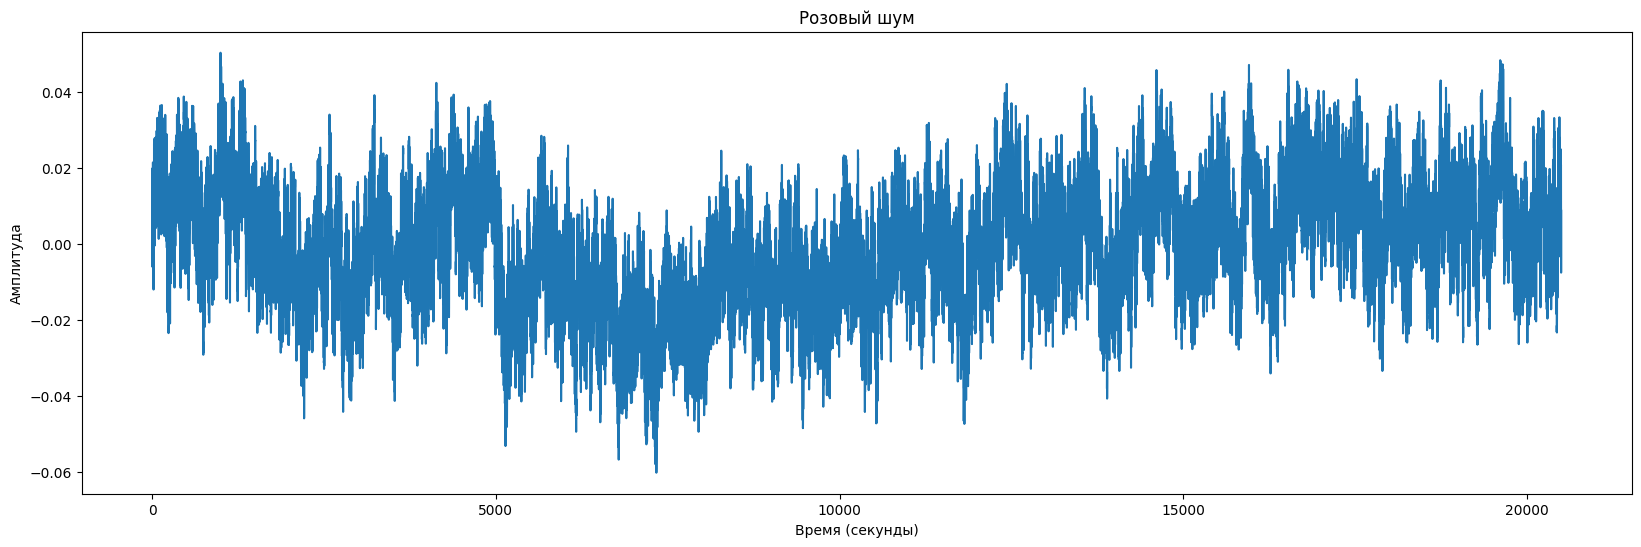

In [127]:
# отрисовываем, что получилось 

time_axis = np.arange(num_of_samples)

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, fft)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [128]:
#Задание 2
#Генерируем черный шум при температуре 17 нанокельвинов

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

T = 17/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq)


black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq,3)/(np.exp(coef2*freq)-1)) + G # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]

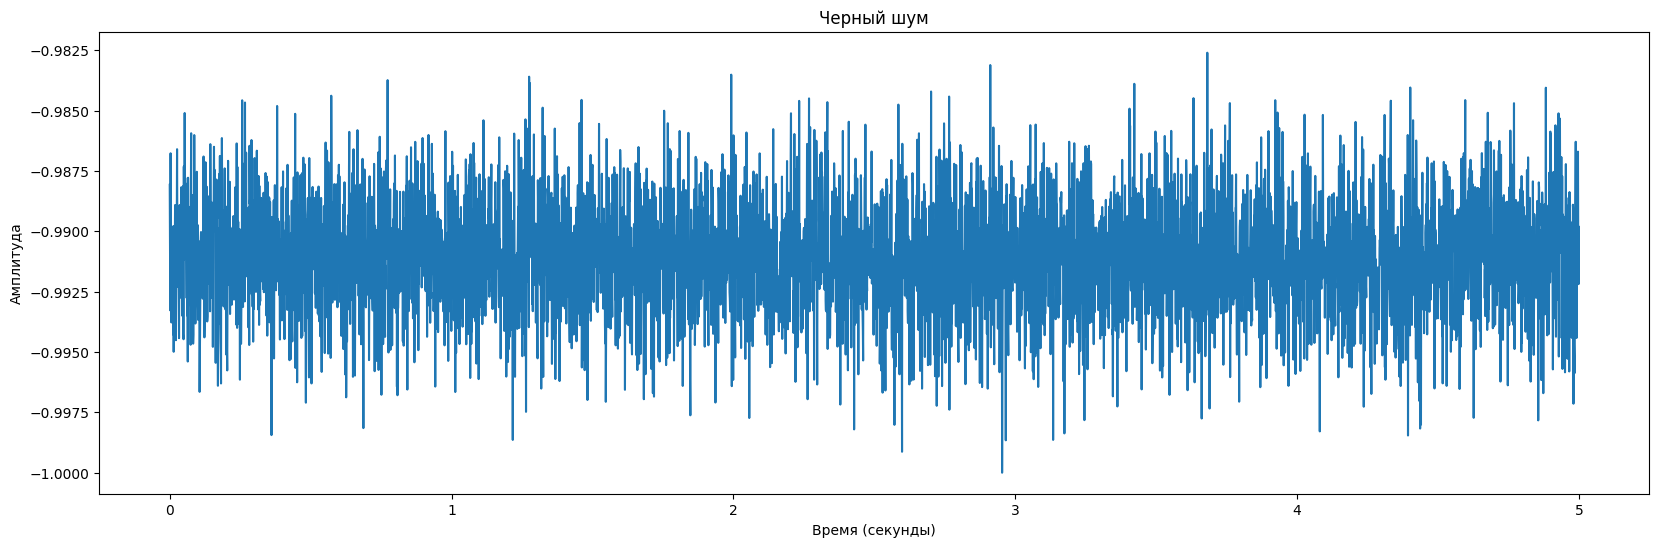

In [129]:
# Визуализация
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

In [130]:
#Задание 3

#Зашумление незашумленного сигнала

time_points = np.linspace(0, duration, num_of_samples)  # Создаем равномерные временные точки от 0 до 5 секунд

white_noise_base = np.random.normal(0,1,size=num_of_samples)  # Генерим белый шум

values = 10*np.cos(4*time_points*np.pi) # вычисляем амплитуды незашумленный сигнала

values_noise = values + white_noise_base # зашумляем сигнал

Text(0, 0.5, 'Амплитуда')

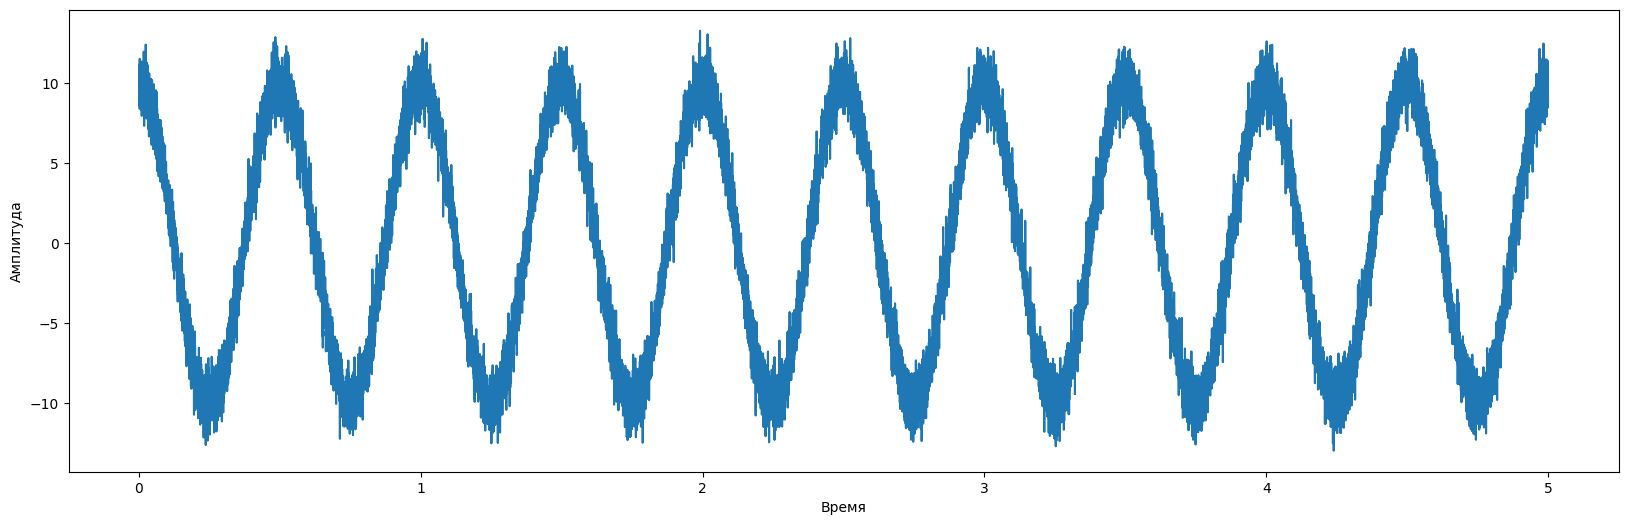

In [131]:
# Визуализация
plt.figure(figsize=(20, 6))
plt.plot(time_points, values_noise)
plt.xlabel('Время')
plt.ylabel('Амплитуда')